<a href="https://colab.research.google.com/github/aycariko/AirRoute_Optimizer/blob/main/carbon_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv('Carbon_Emission.csv')
print(df.head(50))


df.info()



df = pd.read_csv("Carbon_Emission.csv")
print("Satır sayısı:", df.shape[0])
print("Sütun sayısı:", df.shape[1])

# Nümerik sütunlar
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Nümerik değişkenler:", numerical_columns)

# Kategorik sütunlar
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Kategorik değişkenler:", categorical_columns)

      Body Type     Sex         Diet How Often Shower Heating Energy Source  \
0    overweight  female  pescatarian            daily                  coal   
1         obese  female   vegetarian  less frequently           natural gas   
2    overweight    male     omnivore  more frequently                  wood   
3    overweight    male     omnivore      twice a day                  wood   
4         obese  female   vegetarian            daily                  coal   
5    overweight    male   vegetarian  less frequently                  wood   
6   underweight  female        vegan  less frequently                  wood   
7   underweight  female        vegan  more frequently                  coal   
8    overweight    male     omnivore            daily                  wood   
9   underweight  female  pescatarian            daily                  wood   
10       normal  female   vegetarian  more frequently                  wood   
11        obese    male   vegetarian  more frequentl

In [ ]:
target_variable = "CarbonEmission"


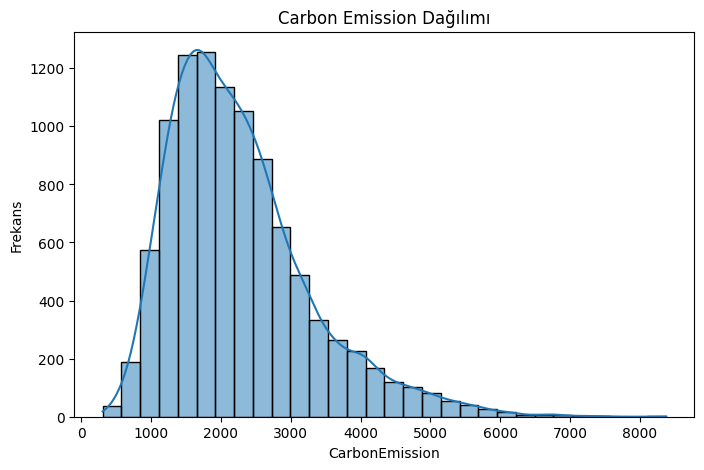

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["CarbonEmission"], kde=True, bins=30)
plt.title("Carbon Emission Dağılımı")
plt.xlabel("CarbonEmission")
plt.ylabel("Frekans")
plt.show()


In [ ]:
df['EmissionLevel'] = pd.qcut(df['CarbonEmission'], q=3, labels=["Low", "Medium", "High"])
print(df['EmissionLevel'].value_counts())


EmissionLevel
Low       3339
High      3334
Medium    3327
Name: count, dtype: int64


In [ ]:
missing_summary = df.isnull().sum()
print("Eksik değer olan sütunlar:\n", missing_summary[missing_summary > 0])


Eksik değer olan sütunlar:
 Vehicle Type    6721
dtype: int64


In [ ]:
missing_percentage = df.isnull().mean() * 100
print("Eksik veri oranları (%):\n", missing_percentage[missing_percentage > 0])


Eksik veri oranları (%):
 Vehicle Type    67.21
dtype: float64


In [ ]:
# Her sütundaki eksik değer sayısı
print(df.isnull().sum())

# Eksik değer oranı (%)
print((df.isnull().mean() * 100).round(2))


Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
Recycling                           0
Cooking_With                        0
CarbonEmission                      0
EmissionLevel                       0
dtype: int64
Body Type                         0.00
Sex                               0.00
Diet                              0.00
How Often Shower                  0.00
Heating Energy Source            

In [ ]:
# Eksik oranı %60’tan fazla olan sütunları kontrol et
missing_ratio = df.isnull().mean() * 100
high_missing_cols = missing_ratio[missing_ratio > 60].index.tolist()
print("Çıkartılabilecek sütunlar:", high_missing_cols)



Çıkartılabilecek sütunlar: ['Vehicle Type']


In [ ]:

# df = pd.read_csv("Carbon_Emission.csv")


In [ ]:
print(df['Vehicle Type'].value_counts())


Vehicle Type
lpg         697
electric    671
petrol      647
hybrid      642
diesel      622
Name: count, dtype: int64


In [ ]:
print(df['Transport'].value_counts())

Transport
walk/bicycle    3427
public          3294
private         3279
Name: count, dtype: int64


In [ ]:
# Transport bilgisiyle araçsız olanları seç
no_vehicle_mask = df['Transport'].isin(['walk/bicycle', 'public'])

# Araçsız kullanıcılar için 'Not Applicable' olarak doldur
df.loc[no_vehicle_mask, 'Vehicle Type'] = 'Not Applicable'

# Diğer eksik kalanlar için mod ile doldur
df['Vehicle Type'] = df['Vehicle Type'].fillna(df['Vehicle Type'].mode()[0])





In [ ]:
print(df['Vehicle Type'].value_counts())

Vehicle Type
Not Applicable    6721
lpg                697
electric           671
petrol             647
hybrid             642
diesel             622
Name: count, dtype: int64


In [ ]:
print(df['Energy efficiency'].value_counts())

Energy efficiency
Sometimes    3463
Yes          3316
No           3221
Name: count, dtype: int64


In [ ]:
print(df['Frequency of Traveling by Air'].value_counts())

Frequency of Traveling by Air
very frequently    2540
frequently         2524
rarely             2477
never              2459
Name: count, dtype: int64


In [ ]:
print(df['How Often Shower'].value_counts())

How Often Shower
daily              2546
twice a day        2516
less frequently    2487
more frequently    2451
Name: count, dtype: int64


In [ ]:
print(df['Social Activity'].value_counts())

Social Activity
never        3406
often        3319
sometimes    3275
Name: count, dtype: int64


In [ ]:
print(df['Waste Bag Size'].value_counts())

Waste Bag Size
small          2525
large          2501
extra large    2500
medium         2474
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_features = {
    'Energy efficiency': ['No', 'Yes','Sometimes'],
    'Frequency of Traveling by Air': ['very frequently', 'frequently', 'rarely', 'never',],
    'How Often Shower': ['daily','twice a day', 'less frequently','more frequently'],
    'Social Activity': ['never','often','sometimes'],
    'Waste Bag Size': ['small', 'medium', 'large', 'extra large']
}

for feature, order in ordinal_features.items():
    encoder = OrdinalEncoder(categories=[order])
    df[feature + '_encoded'] = encoder.fit_transform(df[[feature]])


In [ ]:


# ✅ Buraya ekle: Orijinal kategorik sütunları çıkar
df.drop(columns=list(ordinal_features.keys()), inplace=True)


In [ ]:
nominal_features = ['Diet', 'Transport', 'Heating Energy Source', 'Body Type',
                    'Sex', 'Vehicle Type', 'Cooking_With', 'Recycling']

df = pd.get_dummies(df, columns=nominal_features, drop_first=True)



In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Monthly Grocery Bill', 'Vehicle Monthly Distance Km',
                     'Waste Bag Weekly Count', 'How Many New Clothes Monthly']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [ ]:
# EmissionLevel (low, medium, high) stratify için tekrar oluşturulabilir
df['EmissionLevel'] = pd.qcut(df['CarbonEmission'], q=3, labels=["Low", "Medium", "High"])

X = df.drop(columns=['CarbonEmission', 'EmissionLevel'])
y = df['CarbonEmission']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=df['EmissionLevel'], random_state=42
)


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import numpy as np
import pandas as pd
from collections import Counter

# 1. Modelleri tanımla
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='linear'),
    'Decision Tree': DecisionTreeRegressor(random_state=42),

}

# 2. Cross-validation ayarları
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

# 3. Her model için skorları hesapla
for name, model in models.items():
    r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    mse = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    rmse = np.sqrt(mse)
    mae = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

    cv_results[name] = {
        'R²': np.mean(r2),
        'RMSE': np.mean(rmse),
        'MAE': np.mean(mae)
    }

# 4. Sonuçları tablo halinde göster
results_df = pd.DataFrame(cv_results).T.sort_values(by='R²', ascending=False)
print(results_df)


                         R²        RMSE         MAE
Gradient Boosting  0.953492  219.248822  164.543309
Random Forest      0.915056  296.132339  224.681965
Ridge Regression   0.914339  297.586839  216.988843
Linear Regression  0.914335  297.592627  217.018600
SVR                0.841890  404.180887  264.974903
Decision Tree      0.803061  451.183033  339.046375
KNN                0.560033  674.217383  483.692550


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Grid aralığını sade tut!
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (CV):", grid_search.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best R² Score (CV): 0.9795622766233791


In [ ]:
best_model = GradientBoostingRegressor(**grid_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                          n_estimators=200, random_state=42)

In [ ]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("Test R²:", r2_score(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test MAE:", mean_absolute_error(y_test, y_pred))


Test R²: 0.9814286968871697
Test RMSE: 138.98611107045568
Test MAE: 101.87949469867121


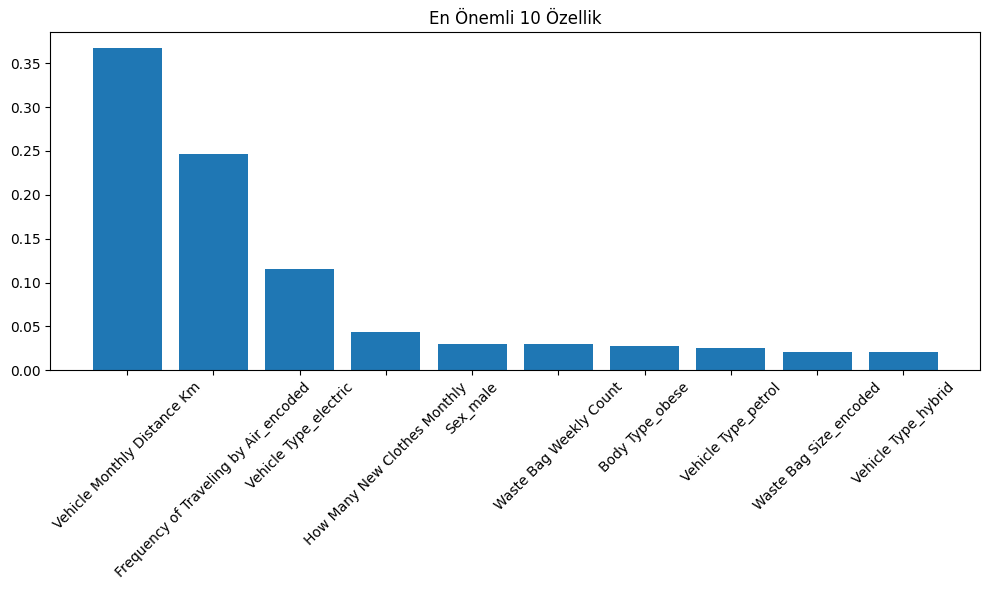

In [ ]:
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
features = X_train.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(10), importances[sorted_idx][:10], align="center")
plt.xticks(range(10), [features[i] for i in sorted_idx[:10]], rotation=45)
plt.title("En Önemli 10 Özellik")
plt.tight_layout()
plt.show()


In [ ]:
importances = best_model.feature_importances_  # sayısal önem değerleri
features = X_train.columns  # sütun isimleri
